# 2-D Objective Functions

In [1]:
from pathlib import Path
import sys

import torch

sys.path.insert(0, "/Users/williamjenkins/Research/Projects/BOGP/Source")
from BOGP.optimization.optimizer import Optimizer, OptimizerConfig
from BOGP.optimization.plotting import ResultsPlotter

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DATA_FOLDER = Path("../../Data/Demos/2D/")
SEED = 2009
N_WARMUP = 3
N_TOTAL = 50

## Objective Function: Rastrigin

In [2]:
from botorch.test_functions import Rastrigin

DIM = 2
M = 1001
N = 1001
obj_func_kwargs = {"dim": DIM, "negate": True}
obj_func = Rastrigin(**obj_func_kwargs)
search_parameters = [
    {"name": "x1", "bounds": [-5.12, 5.12]},
    {"name": "x2", "bounds": [-5.12, 5.12]},
]

X_test = torch.cartesian_prod(
    torch.linspace(
        search_parameters[0]["bounds"][0], search_parameters[0]["bounds"][1], M
    ),
    torch.linspace(
        search_parameters[1]["bounds"][0], search_parameters[1]["bounds"][1], N
    ),
).unsqueeze(1)
print(X_test.shape)

torch.Size([1002001, 1, 2])


/Users/williamjenkins/miniconda3/envs/gp/lib/python3.9/site-packages/torch/functional.py:1069: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1640812094853/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.cartesian_prod(tensors)  # type: ignore[attr-defined]


### Case 1: Expected Improvement

In [3]:
from botorch.acquisition.analytic import ExpectedImprovement

config_ei = OptimizerConfig(
    ExpectedImprovement,
    acq_func_kwargs={"num_samples": 256},
    n_warmup=N_WARMUP,
    n_total=N_TOTAL,
)
optimizer_ei = Optimizer(
    config_ei,
    obj_func,
    search_parameters,
    obj_func_kwargs=obj_func_kwargs,
    device=DEVICE,
    seed=SEED,
)
results_ei = optimizer_ei.run()
optimizer_ei.save(DATA_FOLDER / "2D_RASTRIGIN_EI_optim.pth")
results_ei.save(DATA_FOLDER / "2D_RASTRIGIN_EI_results.pth")

# optim_config = torch.load(DATA_FOLDER / "2D_RASTRIGIN_EI_optim.pth")
# results = Results().load(DATA_FOLDER / "2D_RASTRIGIN_EI_results.pth")
# optim_config

Optimizing: 100%|████████████████████| 47/47 [00:09<00:00,  4.96 eval/s]


In [4]:
optimizer_ei.fixed_parameters

{}

Plotting 2-D
{'x1': tensor([-5.1200, -5.1200, -5.1200,  ...,  5.1200,  5.1200,  5.1200]), 'x2': tensor([-5.1200, -5.1098, -5.0995,  ...,  5.0995,  5.1098,  5.1200])}


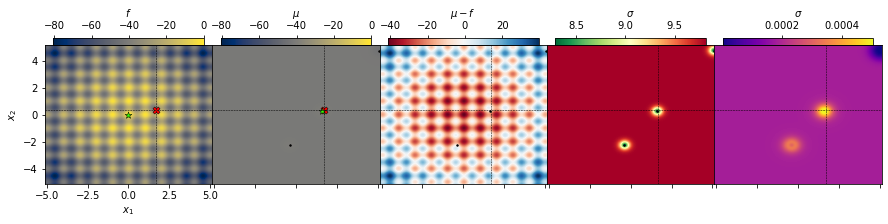

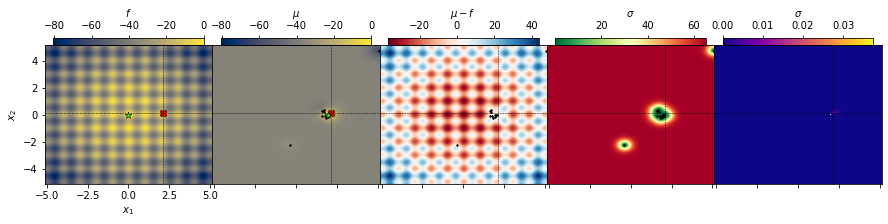

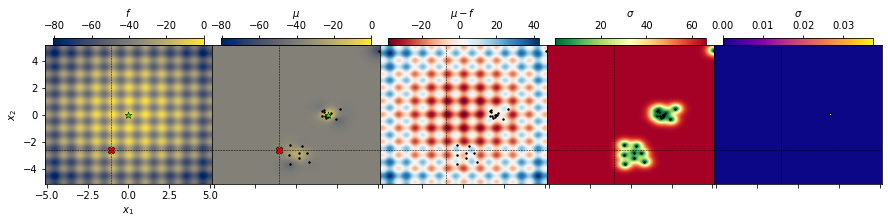

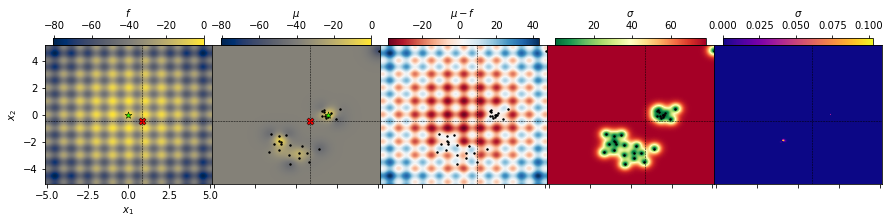

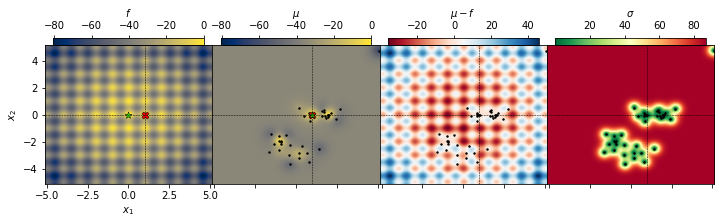

In [5]:
pltr_ei = ResultsPlotter(optimizer_ei._construct_dict(), results_ei)
parameters_to_plot = ["x1", "x2"]
pltr_ei.plot_training_iterations(
    X_test, parameters_to_plot, M=M, N=N, index=[0, 10, 20, 30, 40, -1]
)

### Case 2: Probability of Improvement

In [6]:
from botorch.acquisition.analytic import ProbabilityOfImprovement

config_pi = OptimizerConfig(
    ProbabilityOfImprovement,
    acq_func_kwargs={"num_samples": 256},
    n_warmup=N_WARMUP,
    n_total=N_TOTAL,
)
optimizer_pi = Optimizer(
    config_pi,
    obj_func,
    search_parameters,
    obj_func_kwargs=obj_func_kwargs,
    device=DEVICE,
    seed=SEED,
)
results_pi = optimizer_pi.run()
optimizer_pi.save(DATA_FOLDER / "2D_RASTRIGIN_EI_optim.pth")
results_pi.save(DATA_FOLDER / "2D_RASTRIGIN_EI_results.pth")

Optimizing: 100%|████████████████████| 47/47 [00:17<00:00,  2.68 eval/s]


Plotting 2-D
{'x1': tensor([-5.1200, -5.1200, -5.1200,  ...,  5.1200,  5.1200,  5.1200]), 'x2': tensor([-5.1200, -5.1098, -5.0995,  ...,  5.0995,  5.1098,  5.1200])}


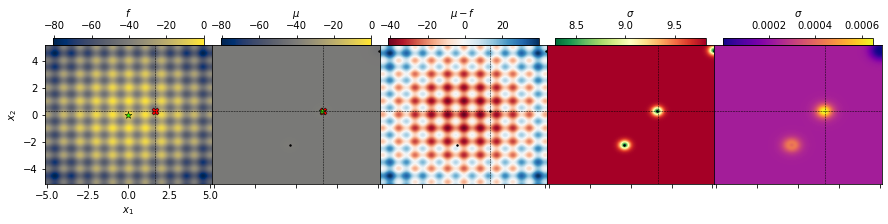

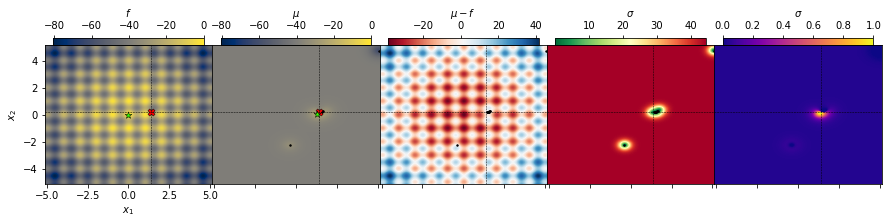

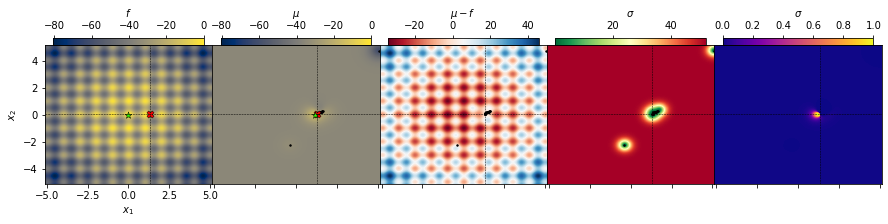

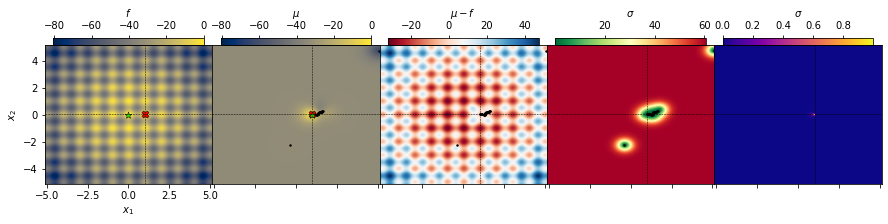

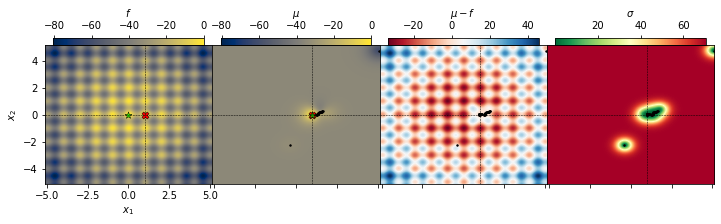

In [7]:
pltr_pi = ResultsPlotter(optimizer_pi._construct_dict(), results_pi)
parameters_to_plot = ["x1", "x2"]
pltr_pi.plot_training_iterations(
    X_test, parameters_to_plot, M=M, N=N, index=[0, 10, 20, 30, 40, -1]
)

### Case 3: q-Expected Improvement

In [8]:
from botorch.acquisition.monte_carlo import qExpectedImprovement
from botorch.sampling.samplers import SobolQMCNormalSampler

config_qei = OptimizerConfig(
    qExpectedImprovement,
    acq_func_kwargs={"num_samples": 256},
    n_warmup=N_WARMUP,
    n_total=N_TOTAL,
    q=3,
    sampler=SobolQMCNormalSampler,
    sampler_kwargs={"num_samples": 256}
)
optimizer_qei = Optimizer(
    config_qei,
    obj_func,
    search_parameters,
    obj_func_kwargs=obj_func_kwargs,
    device=DEVICE,
    seed=SEED,
)
results_qei = optimizer_qei.run()
optimizer_qei.save(DATA_FOLDER / "2D_RASTRIGIN_EqI_optim.pth")
results_qei.save(DATA_FOLDER / "2D_RASTRIGIN_qEI_results.pth")

Optimizing: 100%|████████████████████| 47/47 [00:07<00:00,  6.41 eval/s]


Plotting 2-D
{'x1': tensor([-5.1200, -5.1200, -5.1200,  ...,  5.1200,  5.1200,  5.1200]), 'x2': tensor([-5.1200, -5.1098, -5.0995,  ...,  5.0995,  5.1098,  5.1200])}


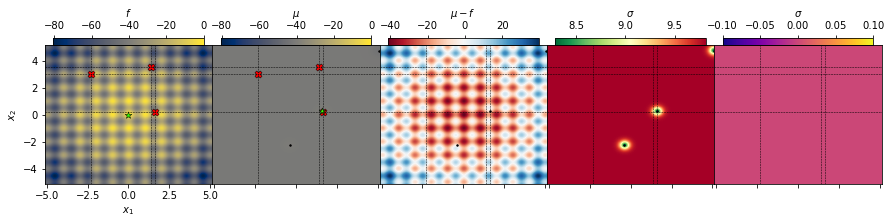

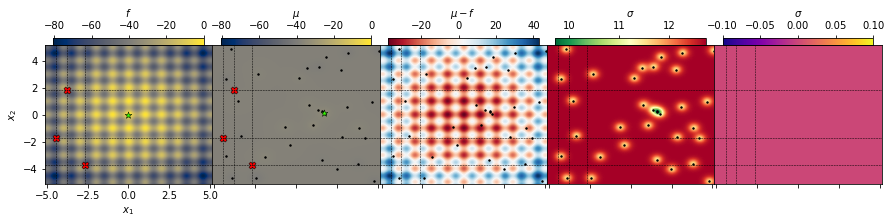

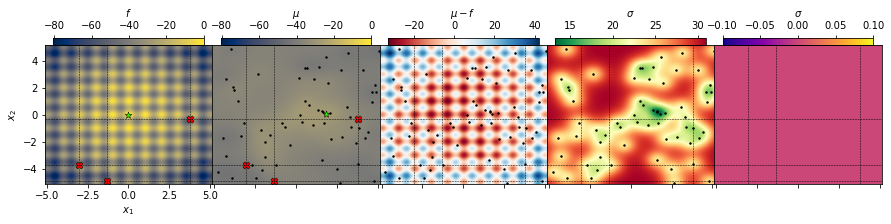

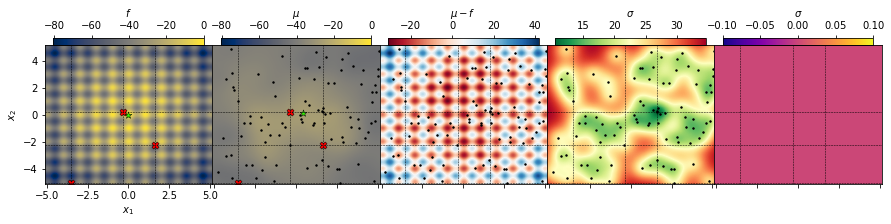

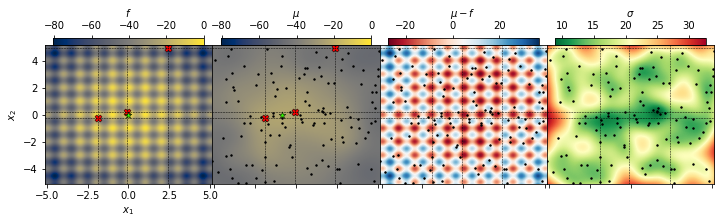

In [9]:
pltr_qei = ResultsPlotter(optimizer_qei._construct_dict(), results_qei)
parameters_to_plot = ["x1", "x2"]
pltr_qei.plot_training_iterations(
    X_test, parameters_to_plot, M=M, N=N, index=[0, 10, 20, 30, 40, -1]
)

## Objective Function: Levy

In [10]:
from botorch.test_functions import Levy

DIM = 2
M = 1001
N = 1001
obj_func_kwargs = {"dim": DIM, "negate": True}
obj_func = Rastrigin(**obj_func_kwargs)
search_parameters = [
    {"name": "x1", "bounds": [-5.12, 5.12]},
    {"name": "x2", "bounds": [-5.12, 5.12]},
]

X_test = torch.cartesian_prod(
    torch.linspace(
        search_parameters[0]["bounds"][0], search_parameters[0]["bounds"][1], M
    ),
    torch.linspace(
        search_parameters[1]["bounds"][0], search_parameters[1]["bounds"][1], N
    ),
)
X_test = X_test[:, None, :]

### Case 1: Expected Improvement

In [11]:
from botorch.acquisition.analytic import ExpectedImprovement

config_ei = OptimizerConfig(
    ExpectedImprovement,
    acq_func_kwargs={"num_samples": 256},
    n_warmup=N_WARMUP,
    n_total=N_TOTAL,
)
optimizer_ei = Optimizer(
    config_ei,
    obj_func,
    search_parameters,
    obj_func_kwargs=obj_func_kwargs,
    device=DEVICE,
    seed=SEED,
)
results_ei = optimizer_ei.run()
optimizer_ei.save(DATA_FOLDER / "2D_LEVY_EI_optim.pth")
results_ei.save(DATA_FOLDER / "2D_LEVY_EI_results.pth")

Optimizing: 100%|████████████████████| 47/47 [00:09<00:00,  4.77 eval/s]


Plotting 2-D
{'x1': tensor([-5.1200, -5.1200, -5.1200,  ...,  5.1200,  5.1200,  5.1200]), 'x2': tensor([-5.1200, -5.1098, -5.0995,  ...,  5.0995,  5.1098,  5.1200])}


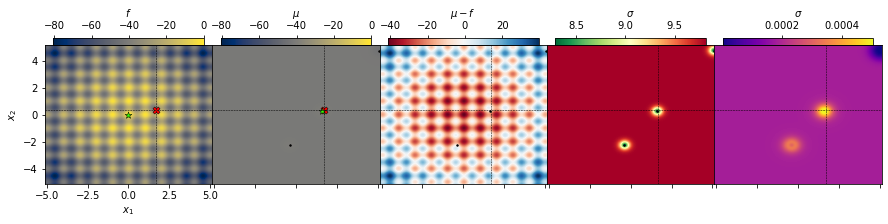

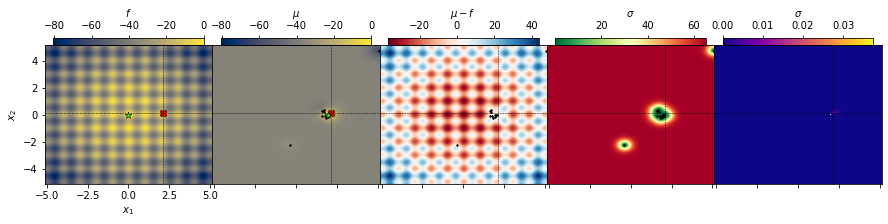

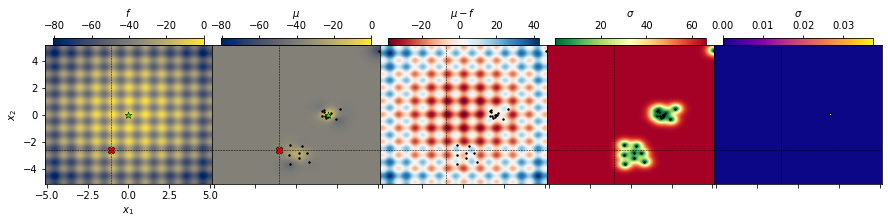

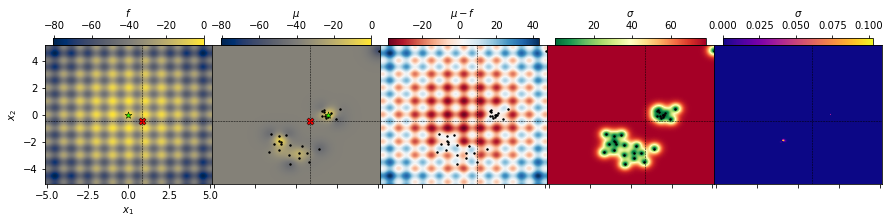

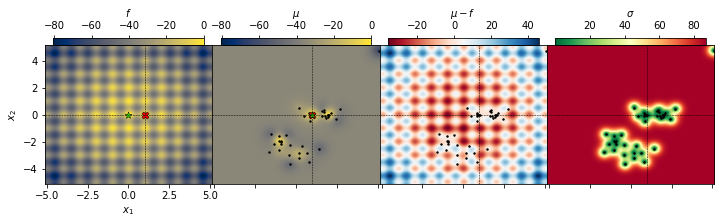

In [12]:
pltr_ei = ResultsPlotter(optimizer_ei._construct_dict(), results_ei)
parameters_to_plot = ["x1", "x2"]
pltr_ei.plot_training_iterations(
    X_test, parameters_to_plot, M=M, N=N, index=[0, 10, 20, 30, 40, -1]
)

### Case 2: Probability of Improvement

In [13]:
from botorch.acquisition.analytic import ProbabilityOfImprovement

config_pi = OptimizerConfig(
    ProbabilityOfImprovement,
    acq_func_kwargs={"num_samples": 256},
    n_warmup=N_WARMUP,
    n_total=N_TOTAL,
)
optimizer_pi = Optimizer(
    config_pi,
    obj_func,
    search_parameters,
    obj_func_kwargs=obj_func_kwargs,
    device=DEVICE,
    seed=SEED,
)
results_pi = optimizer_pi.run()
optimizer_pi.save(DATA_FOLDER / "2D_LEVY_PI_optim.pth")
results_pi.save(DATA_FOLDER / "2D_LEVY_PI_results.pth")

Optimizing: 100%|████████████████████| 47/47 [00:17<00:00,  2.64 eval/s]


Plotting 2-D
{'x1': tensor([-5.1200, -5.1200, -5.1200,  ...,  5.1200,  5.1200,  5.1200]), 'x2': tensor([-5.1200, -5.1098, -5.0995,  ...,  5.0995,  5.1098,  5.1200])}


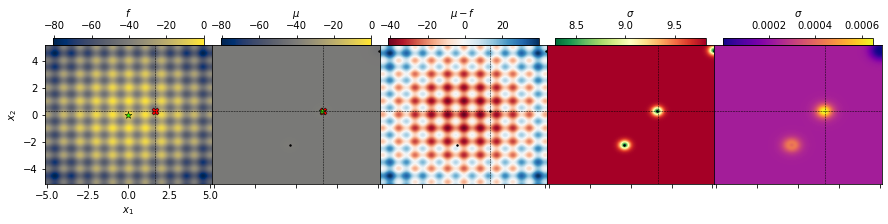

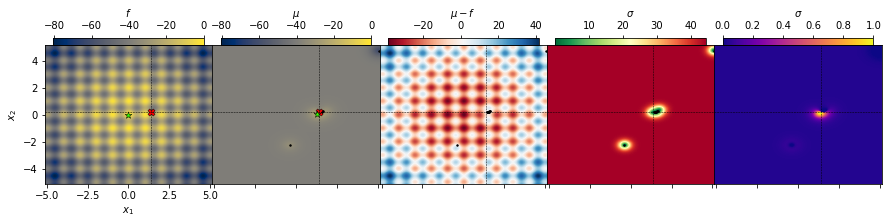

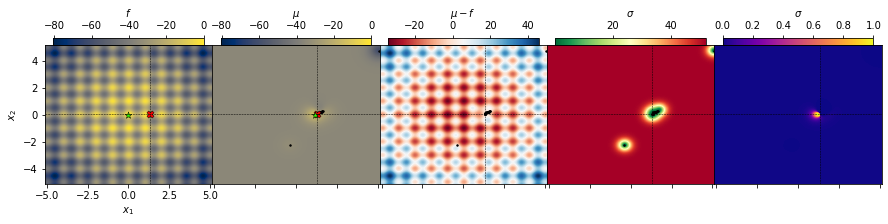

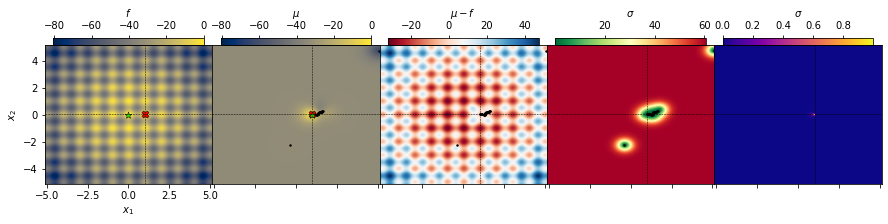

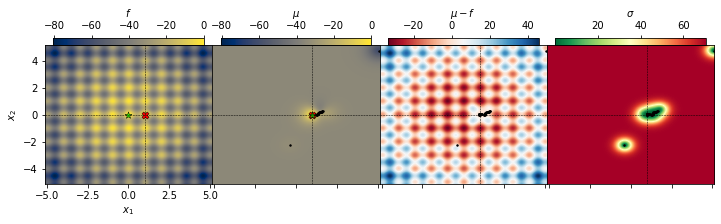

In [14]:
pltr_pi = ResultsPlotter(optimizer_pi._construct_dict(), results_pi)
parameters_to_plot = ["x1", "x2"]
pltr_pi.plot_training_iterations(
    X_test, parameters_to_plot, M=M, N=N, index=[0, 10, 20, 30, 40, -1]
)

### Case 3: q-Expected Improvement

In [15]:
from botorch.acquisition.monte_carlo import qExpectedImprovement
from botorch.sampling.samplers import SobolQMCNormalSampler

config_qei = OptimizerConfig(
    qExpectedImprovement,
    acq_func_kwargs={"num_samples": 256},
    n_warmup=N_WARMUP,
    n_total=N_TOTAL,
    q=3,
    sampler=SobolQMCNormalSampler,
    sampler_kwargs={"num_samples": 256}
)
optimizer_qei = Optimizer(
    config_qei,
    obj_func,
    search_parameters,
    obj_func_kwargs=obj_func_kwargs,
    device=DEVICE,
    seed=SEED,
)
results_qei = optimizer_qei.run()
optimizer_qei.save(DATA_FOLDER / "2D_LEVY_qEI_optim.pth")
results_qei.save(DATA_FOLDER / "2D_LEVY_qEI_results.pth")

Optimizing: 100%|████████████████████| 47/47 [00:06<00:00,  7.54 eval/s]


Plotting 2-D
{'x1': tensor([-5.1200, -5.1200, -5.1200,  ...,  5.1200,  5.1200,  5.1200]), 'x2': tensor([-5.1200, -5.1098, -5.0995,  ...,  5.0995,  5.1098,  5.1200])}


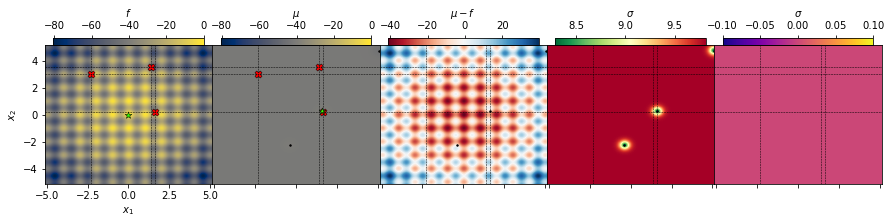

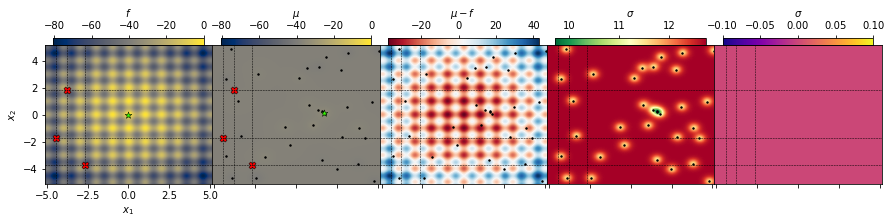

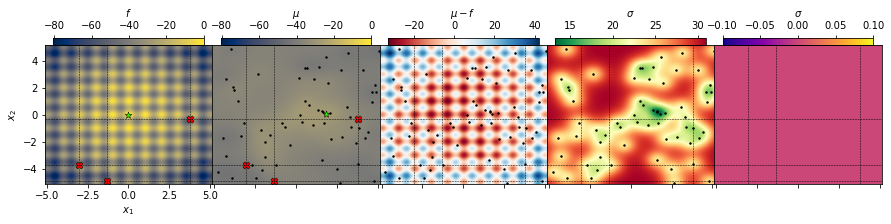

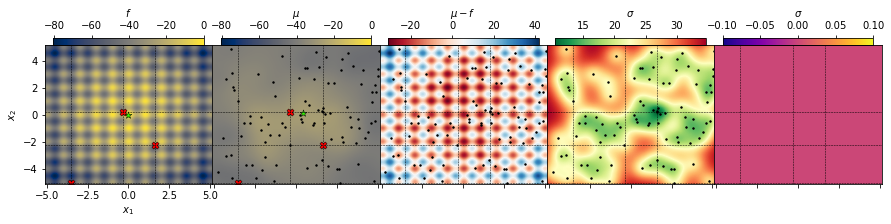

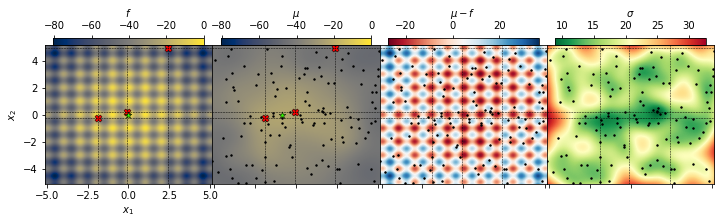

In [18]:
pltr_qei = ResultsPlotter(optimizer_qei._construct_dict(), results_qei)
parameters_to_plot = ["x1", "x2"]
pltr_qei.plot_training_iterations(
    X_test, parameters_to_plot, M=M, N=N, index=[0, 10, 20, 30, 40, -1]
)